In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
%matplotlib inline

In [121]:
start = dt.datetime(2020, 1, 1)

mbb = pdr.get_data_yahoo("1155.KL",start)
mbb = mbb['Close']

gmb = pdr.get_data_yahoo("4715.KL",start)
gmb = gmb['Close']

gb = pdr.get_data_yahoo("3182.KL",start)
gb = gb['Close']

hlb = pdr.get_data_yahoo("5819.KL",start)
hlb = hlb['Close']

In [122]:
stocks = pd.concat([mbb,gmb,gb,hlb],axis=1)
stocks.columns = ['mbb','gmb','gb','hlb']

In [123]:
stocks.head()

,mbb,gmb,gb,hlb
Date,,,,
2020-01-02,8.75,3.31,6.08,17.299999
2020-01-03,8.75,3.32,6.12,17.440001
2020-01-06,8.65,3.28,6.04,17.600000
2020-01-07,8.65,3.29,6.02,17.660000
2020-01-08,8.54,3.24,6.00,17.559999


In [124]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

mbb    0.000126
gmb    0.000045
gb    -0.000251
hlb    0.000434
dtype: float64

In [125]:
stocks.pct_change(1).corr()

,mbb,gmb,gb,hlb
mbb,1.000000,0.608924,0.627791,0.561874
gmb,0.608924,1.000000,0.809337,0.433990
gb,0.627791,0.809337,1.000000,0.511079
hlb,0.561874,0.433990,0.511079,1.000000


In [126]:
#Simulating Thousands of Possible Allocations

<AxesSubplot:xlabel='Date'>

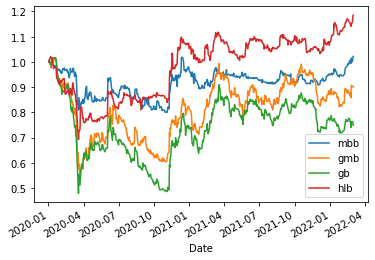

In [127]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [128]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,mbb,gmb,gb,hlb
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.000000,0.003021,0.006579,0.008093
2020-01-06,-0.011429,-0.012048,-0.013072,0.009174
2020-01-07,0.000000,0.003049,-0.003311,0.003409
2020-01-08,-0.012717,-0.015198,-0.003322,-0.005663


In [129]:
#Log Returns vs Arithmetic Returns

In [130]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,mbb,gmb,gb,hlb
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.000000,0.003017,0.006557,0.008060
2020-01-06,-0.011494,-0.012121,-0.013158,0.009132
2020-01-07,0.000000,0.003044,-0.003317,0.003403
2020-01-08,-0.012798,-0.015314,-0.003328,-0.005679


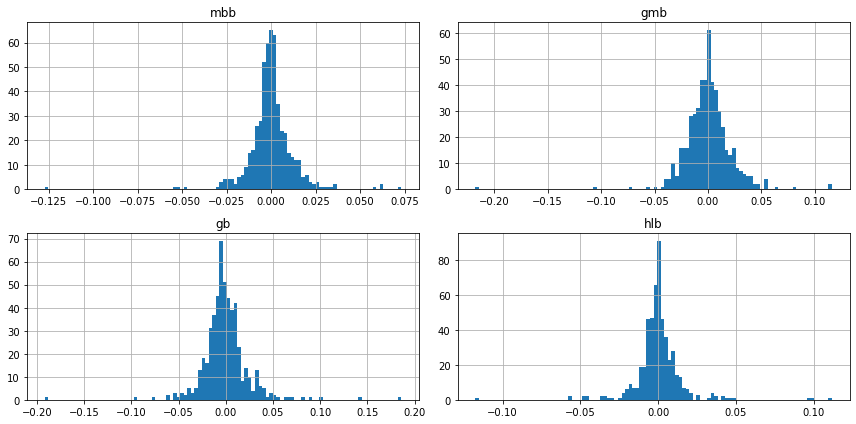

In [131]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [132]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mbb,530.0,0.000041,0.013089,-0.127339,-0.004834,0.000000,0.004761,0.073104
gmb,530.0,-0.000198,0.022145,-0.217413,-0.010999,0.000000,0.009772,0.115685
gb,530.0,-0.000547,0.024274,-0.191667,-0.011682,-0.002206,0.008542,0.185660
hlb,530.0,0.000320,0.015073,-0.117441,-0.004975,0.000000,0.005098,0.111640


In [133]:
log_ret.mean() * 252

mbb    0.010214
gmb   -0.049936
gb    -0.137829
hlb    0.080696
dtype: float64

In [134]:
# Compute pairwise covariance of columns
log_ret.cov()

,mbb,gmb,gb,hlb
mbb,0.000171,0.000179,0.000201,0.000111
gmb,0.000179,0.000490,0.000438,0.000147
gb,0.000201,0.000438,0.000589,0.000188
hlb,0.000111,0.000147,0.000188,0.000227


In [135]:
log_ret.cov()*252 # multiply by days

,mbb,gmb,gb,hlb
mbb,0.043174,0.045119,0.050554,0.028083
gmb,0.045119,0.123581,0.110360,0.037105
gb,0.050554,0.110360,0.148485,0.047324
hlb,0.028083,0.037105,0.047324,0.057253


In [136]:
#Single Run for Some Random Allocation

In [137]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['mbb', 'gmb', 'gb', 'hlb'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
-0.010338236737837143


Expected Volatility
0.2431411269026978


Sharpe Ratio
-0.042519490098334466


In [138]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [139]:
sharpe_arr.max()

0.2711369601065941

In [140]:
sharpe_arr.argmax()

12241

In [162]:
all_weights[12241,:]

array([0.23385529, 0.03615298, 0.00798399, 0.72200774])

In [163]:
max_sr_ret = ret_arr[12241]
max_sr_vol = vol_arr[12241]

In [164]:
#Plotting the data

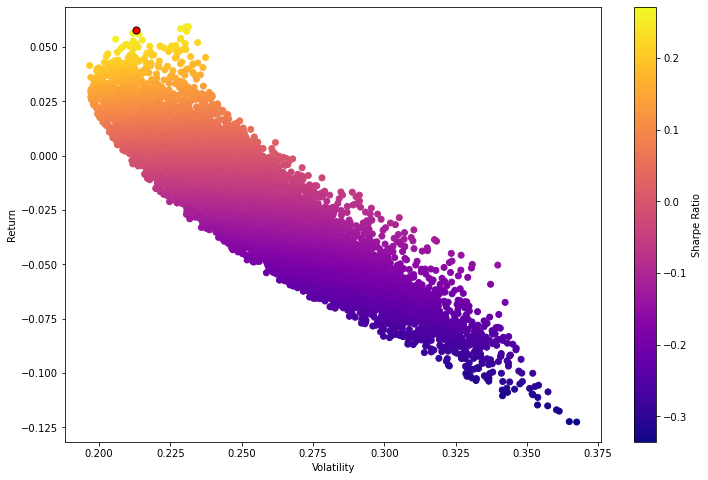

In [165]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [166]:
#Mathematical Optimization
#Functionalize Return and SR operations

In [167]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [168]:
from scipy.optimize import minimize

In [169]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [170]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [171]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [172]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [173]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [174]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [175]:
opt_results

     fun: -0.3372505720705522
     jac: array([1.22736085e-01, 4.27265048e-01, 8.54781926e-01, 3.72529030e-09])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([9.71445147e-16, 4.57966998e-16, 0.00000000e+00, 1.00000000e+00])

In [176]:
opt_results.x

array([9.71445147e-16, 4.57966998e-16, 0.00000000e+00, 1.00000000e+00])

In [177]:
get_ret_vol_sr(opt_results.x)

array([0.08069631, 0.23927701, 0.33725057])

In [178]:
#All Optimal Portfolios (Efficient Frontier)

In [179]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [180]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [181]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

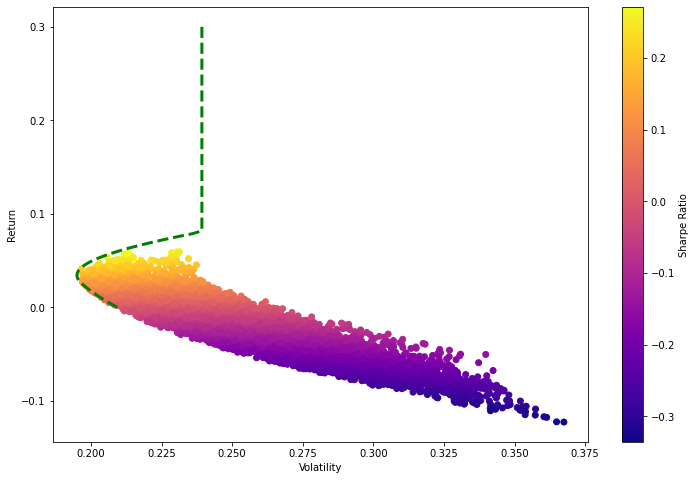

In [182]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)